# IMPORT OF DATA FROM INFLUXDB

In [ ]:
#Installing & Importing necessary librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
# Import the library "InfluxDB"
from influxdb import InfluxDBClient

In [ ]:
#Create an object of influxdbclient
client = InfluxDBClient(host='localhost', port=8086)

In [ ]:
#View the list of databases in influxDB
client.get_list_database()

In [ ]:
#Use the 'beverage DB"
client.switch_database('beverage')

In [ ]:
#Run an SQL query to fetch all data from the beverage database (pet_sensor_readings) in influxDB
result = client.query("select * from pet_sensor_readings")
#result

In [ ]:
#Store the result set in a list
e = next(iter(result))
#Convert the list into a dataframe
df = pd.DataFrame(e)

In [ ]:
#Save the data to a csv file
df.to_csv("C:/Users/Madhu Lodugu/Documents/beverage/beverage.csv")

# ##                                      EXPLORATORY DATA ANALYSIS

In [2]:
#Loading the extracted data from data base
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Live Project\\2\\Data\\beverage_backup\\Beverage.csv")

In [3]:
#Determines data shape(rows*col)
df.shape

(1364797, 18)

In [4]:
#column names
df.columns

Index(['Unnamed: 0', 'time', 'Blower', 'Co2', 'Date_coder', 'Day', 'Filler',
       'Hour', 'Labeller', 'Month', 'PSP', 'Palletizer', 'Plasmax', 'Preform',
       'Uday', 'Week', 'Year', 'product'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,time,Blower,Co2,Date_coder,Day,Filler,Hour,Labeller,Month,PSP,Palletizer,Plasmax,Preform,Uday,Week,Year,product
0,0,2020-08-16T00:40:31.755413Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
1,1,2020-08-16T00:40:34.724393Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
2,2,2020-08-16T00:40:37.700167Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
3,3,2020-08-16T00:40:40.669245Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
4,4,2020-08-16T00:40:43.620928Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola


In [6]:
#Checking for null values
df.isnull().sum()

Unnamed: 0          0
time                0
Blower        1057390
Co2           1270521
Date_coder    1111734
Day                 0
Filler         961695
Hour                0
Labeller       961695
Month               0
PSP           1361107
Palletizer    1361107
Plasmax       1061536
Preform       1057390
Uday                0
Week                0
Year                0
product             0
dtype: int64

In [7]:
#get some stat
df.describe()

,Unnamed: 0,Blower,Co2,Date_coder,Day,Filler,Hour,Labeller,Month,PSP,Palletizer,Plasmax,Preform,Week,Year
count,1.364797e+06,307407.000000,9.427600e+04,253063.000000,1.364797e+06,403102.000000,1.364797e+06,403102.000000,1364797.0,3690.000000,3690.000000,303261.000000,307407.000000,1.364797e+06,1364797.0
mean,6.823980e+05,20.175396,2.029638e+06,18.600728,2.025061e+01,8.699076,1.125214e+01,8.649066,8.0,38.725203,38.725203,15.615467,20.175396,3.329716e+01,2020.0
std,3.939831e+05,26.734445,4.917192e+05,21.243542,3.106284e+00,6.690983,7.113220e+00,6.711026,0.0,73.896041,73.896041,16.674202,26.734445,4.570081e-01,0.0
min,0.000000e+00,0.000000,1.436417e+06,0.000000,1.600000e+01,0.000000,0.000000e+00,0.000000,8.0,0.000000,0.000000,0.000000,0.000000,3.300000e+01,2020.0
25%,3.411990e+05,7.000000,1.451199e+06,10.000000,1.800000e+01,10.000000,5.000000e+00,9.000000,8.0,25.000000,25.000000,10.000000,7.000000,3.300000e+01,2020.0
50%,6.823980e+05,13.000000,2.446978e+06,10.000000,2.000000e+01,10.000000,1.100000e+01,10.000000,8.0,38.000000,38.000000,10.000000,13.000000,3.300000e+01,2020.0
75%,1.023597e+06,18.000000,2.449111e+06,20.000000,2.300000e+01,10.000000,1.800000e+01,10.000000,8.0,46.000000,46.000000,11.000000,18.000000,3.400000e+01,2020.0
max,1.364796e+06,3385.000000,2.449111e+06,3383.000000,2.600000e+01,3382.000000,2.300000e+01,3396.000000,8.0,3109.000000,3109.000000,3394.000000,3385.000000,3.400000e+01,2020.0


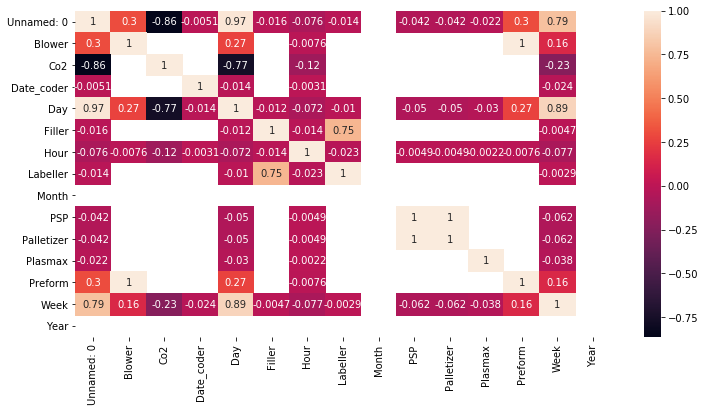

In [8]:
#Heat map to check correlation
cor = df.corr()
Fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cor, annot = True)

In [9]:
#Drop unecessary column
df.drop(['Unnamed: 0','Co2', 'Date_coder', 'Day', 'Hour', 'Month', 'PSP', 'Palletizer', 'Plasmax', 'Preform', 'Uday', 'Week', 'Year', 'product'], axis = 1, inplace = True)

In [10]:
#Date & Time formatting
df['time'] = pd.to_datetime(df['time'], format= "%Y-%m-%d %H:%M:%S") 

In [11]:
df.dtypes

time        datetime64[ns, UTC]
Blower                  float64
Filler                  float64
Labeller                float64
dtype: object

In [12]:
df.head()

,time,Blower,Filler,Labeller
0,2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN
1,2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN
2,2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN
3,2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN
4,2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN


In [13]:
#Making time as index
df.index = df['time']

In [14]:
beverage_df = df.resample('H').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232DFD565C8>,
      dtype=object)

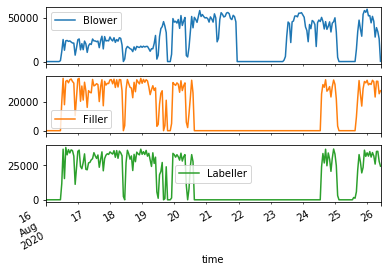

In [15]:
df.resample('H').sum().plot(subplots=True)

In [16]:
#As the normal efficiency of machine is 10 bottles/sec or 36000 bottles/hour, so will divide all the blower value which exceeded 36000/hr by 2
#Diving Blower values by 2 which ever exceeds 360000 bottles
beverage_df['Blower'] = beverage_df['Blower'].apply(lambda x: x/2 if x>=36000 else x)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232DFB79DC8>,
      dtype=object)

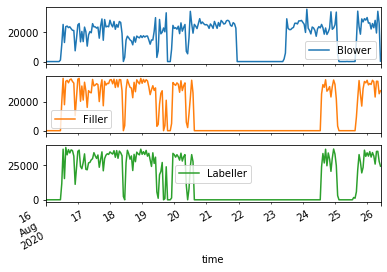

In [17]:
beverage_df.plot(subplots=True)

# Calculating time differences between each records to find out break points present in data

In [18]:
df["lagged_time"] = df.time.shift(1)
df["Time_diff"] = (df["time"] - df["lagged_time"])
df['tot_mins_diff'] = (df.time - df.lagged_time) / pd.Timedelta(minutes=1)

In [19]:
df['machine_condition'] = np.where(df['tot_mins_diff'] > 10 , "Downtime", "working")
df.head()

,time,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,,
2020-08-16 00:40:31.755413+00:00,2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
2020-08-16 00:40:34.724393+00:00,2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,00:00:02.968980,0.049483,working
2020-08-16 00:40:37.700167+00:00,2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,00:00:02.975774,0.049596,working
2020-08-16 00:40:40.669245+00:00,2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,00:00:02.969078,0.049485,working
2020-08-16 00:40:43.620928+00:00,2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,00:00:02.951683,0.049195,working


In [58]:
#df = df.reset_index()

In [21]:
df["machine_condition"].value_counts()

working     1364786
Downtime         11
Name: machine_condition, dtype: int64

In [22]:
Downtime_data = df.loc[(df['machine_condition'] == 'Downtime')]
Downtime_data.head(11)

,time,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,,
2020-08-18 11:45:29.669503+00:00,2020-08-18 11:45:29.669503+00:00,3.0,NaN,NaN,2020-08-18 10:51:22.047472+00:00,0 days 00:54:07.622031,54.127034,Downtime
2020-08-21 09:06:29.395212+00:00,2020-08-21 09:06:29.395212+00:00,7.0,NaN,NaN,2020-08-21 08:28:33.414716+00:00,0 days 00:37:55.980496,37.933008,Downtime
2020-08-23 10:03:49.438415+00:00,2020-08-23 10:03:49.438415+00:00,4.0,NaN,NaN,2020-08-21 23:06:22.222952+00:00,1 days 10:57:27.215463,2097.453591,Downtime
2020-08-23 11:16:06.717764+00:00,2020-08-23 11:16:06.717764+00:00,NaN,NaN,NaN,2020-08-23 10:10:08.277038+00:00,0 days 01:05:58.440726,65.974012,Downtime
2020-08-23 11:48:47.813784+00:00,2020-08-23 11:48:47.813784+00:00,NaN,NaN,NaN,2020-08-23 11:26:32.394138+00:00,0 days 00:22:15.419646,22.256994,Downtime
2020-08-23 15:23:12.695103+00:00,2020-08-23 15:23:12.695103+00:00,NaN,NaN,NaN,2020-08-23 15:08:41.655947+00:00,0 days 00:14:31.039156,14.517319,Downtime
2020-08-24 18:59:47.062442+00:00,2020-08-24 18:59:47.062442+00:00,NaN,0.0,6.0,2020-08-24 18:49:18.197170+00:00,0 days 00:10:28.865272,10.481088,Downtime
2020-08-25 09:00:55.286625+00:00,2020-08-25 09:00:55.286625+00:00,22.0,NaN,NaN,2020-08-25 02:25:52.347694+00:00,0 days 06:35:02.938931,395.048982,Downtime
2020-08-25 10:14:55.661248+00:00,2020-08-25 10:14:55.661248+00:00,NaN,0.0,0.0,2020-08-25 09:00:58.253104+00:00,0 days 01:13:57.408144,73.956802,Downtime


In [24]:
df.head()

,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,00:00:02.968980,0.049483,working
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,00:00:02.975774,0.049596,working
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,00:00:02.969078,0.049485,working
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,00:00:02.951683,0.049195,working


In [25]:
downtime_1 = beverage_df.loc["2020-08-16 00:40:34.724393+00:00":"2020-08-18 11:45:29.669503+00:00"]
downtime_1.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0
2020-08-16 05:00:00+00:00,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002328EF04A48>,
      dtype=object)

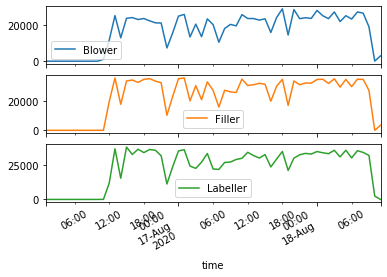

In [26]:
downtime_1.plot(subplots=True)

In [27]:
downtime_2 = beverage_df.loc["2020-08-18 11:45:29.669503+00:00":"2020-08-21 09:06:29.395212+00:00"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232DFB79EC8>,
      dtype=object)

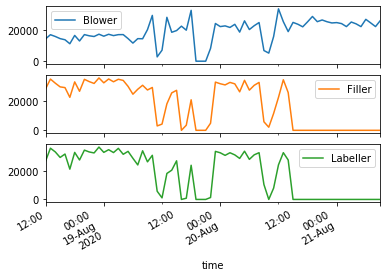

In [28]:
downtime_2.plot(subplots=True)

In [29]:
downtime_3 = beverage_df.loc["2020-08-21 09:06:29.395212+00:00":"2020-08-23 10:03:49.438415+00:00"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002328F116888>,
      dtype=object)

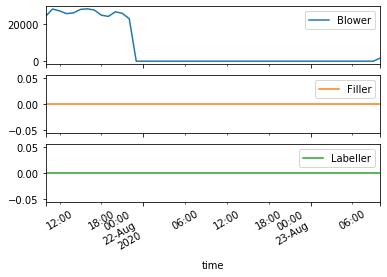

In [30]:
downtime_3.plot(subplots=True)

In [31]:
df.head()

,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,00:00:02.968980,0.049483,working
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,00:00:02.975774,0.049596,working
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,00:00:02.969078,0.049485,working
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,00:00:02.951683,0.049195,working


In [32]:
df.drop(['lagged_time','Time_diff', 'tot_mins_diff', 'machine_condition'], axis = 1, inplace = True)

## BLOWER ######

In [33]:
#Aggregation by hour
df1 = df.resample('H').sum()
df1.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [59]:
#Diving Blower values by 2 which ever exceeds 360000 bottles
df1['Blower'] = df1['Blower'].apply(lambda x: x/2 if x>=36000 else x)

In [60]:
#Creating train and test set 
train = df1[0:201] 
test = df1[201:]

In [61]:
blow_test = test.Blower
blow_train = train.Blower

In [62]:
blow_test.shape
blow_train.shape

(201,)

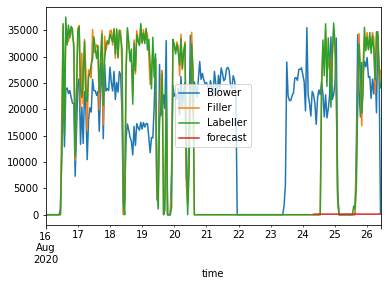

In [63]:
df1.plot()

In [64]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

#The Dickey-Fuller test: It is used to determine the presence of unit root in a series, and hence help us to understand if the series is stationary or not.
#Ho: It is non stationary
#H1: It is stationary

In [65]:
test_result=adfuller(df1['Blower'])

In [66]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Blower):
    result=adfuller(Blower)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [67]:
adfuller_test(df1['Blower'])

ADF Test Statistic : -3.704802278425481
p-value : 0.0040461106241147
#Lags Used : 2
Number of Observations Used : 248
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


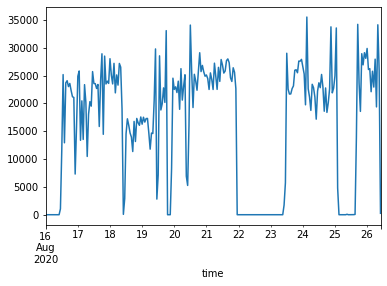

In [68]:
df1['Blower'].plot()

#ACF(auto-correlation function) : It describes how well the present value of the series is related to its past values.

#PACF(partial autocorrelation function) : Instead of finding correlations of present with lags like ACF, it finds the correlations of the residuals with the next lag value thus ‘partial’ and not ‘complete’ as we remove already found variations before we find next correlation.

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

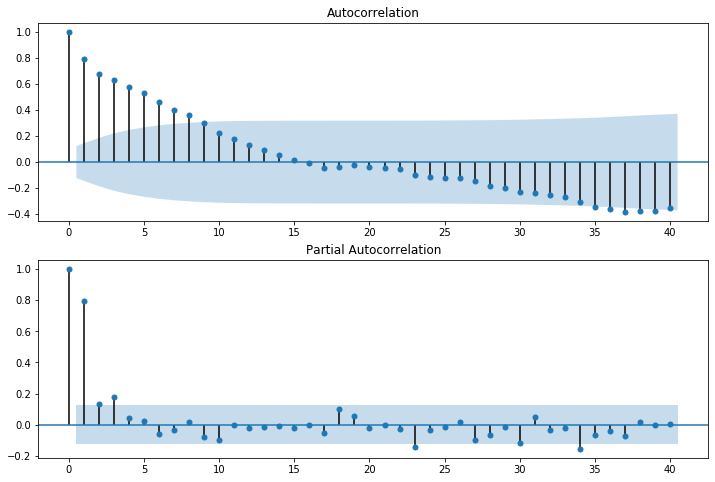

In [70]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Blower'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Blower'].iloc[0:],lags=40,ax=ax2)


ARIMA MODEL Auto Regression Integrated Moving Average It is specified by three parameters (p,d,q) Here, p is the order of the autoregressive model (number of time lags) d is the degree of differencing (no. of times the data have had passed values subtracted) q is the order of moving average model The ARIMA forecasting for a stationary time series is nothing but a linear (like linear regression) equation

In [71]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [72]:
#pqd
#ARIMA
blow_model = ARIMA(blow_train, order=(1,1,1))

In [73]:
blow_model_fit = blow_model.fit()

In [74]:
blow_model_fit.aic

4066.801060097675

In [75]:
blow_forecast = blow_model_fit.forecast(steps = 50)[0]

In [76]:
from sklearn.metrics import mean_squared_error
#from math import sqrt
import numpy as np

In [77]:
np.sqrt(mean_squared_error(blow_test,blow_forecast))

14729.155865529863

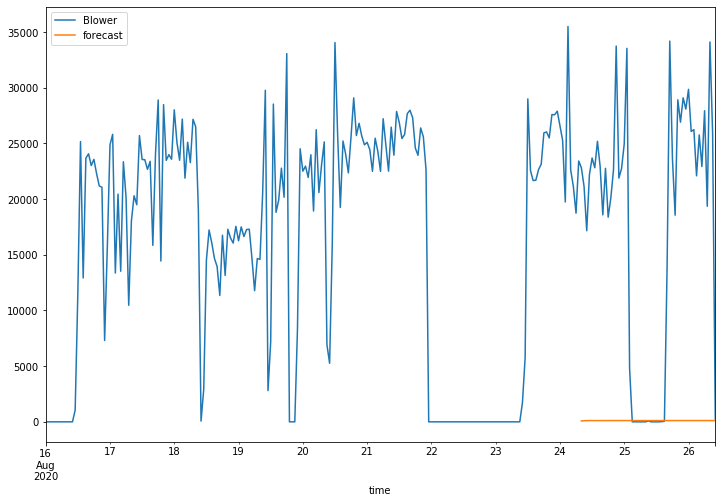

In [78]:
df1['forecast']=blow_model_fit.predict(start=200,end=250,dynamic=True)
df1[['Blower','forecast']].plot(figsize=(12,8))

#### SARIMA

In [79]:
blower_model=sm.tsa.statespace.SARIMAX(blow_train,order=(1, 1, 1),seasonal_order=(1,1,1,24))

In [80]:
blower_model_fit = blower_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [81]:
#results.summary()
blower_model_fit.aic

3593.713639316372

In [82]:
blower_forecast = blower_model_fit.forecast(steps = 50)

In [83]:
np.sqrt(mean_squared_error(blow_test,blower_forecast))

13115.200582157131

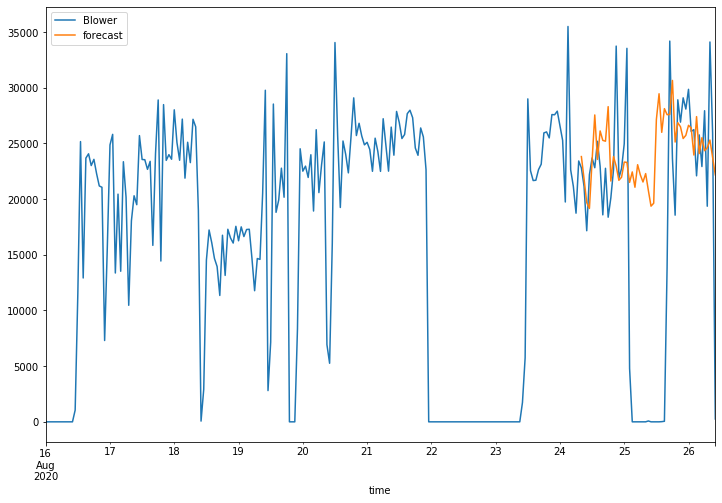

In [84]:
df1['forecast']=blower_model_fit.predict(start=200,end=251,dynamic=True)
df1[['Blower','forecast']].plot(figsize=(12,8))

In [85]:
from pandas.tseries.offsets import DateOffset
#future_dates=[df1.index[-1]+ DateOffset(hours=x)for x in range(0,24)]
future_dates=[df1.index[-1]+ DateOffset(hours=x)for x in range(0,50)]

In [86]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [87]:
future_df1=pd.concat([df1,future_datest_df1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


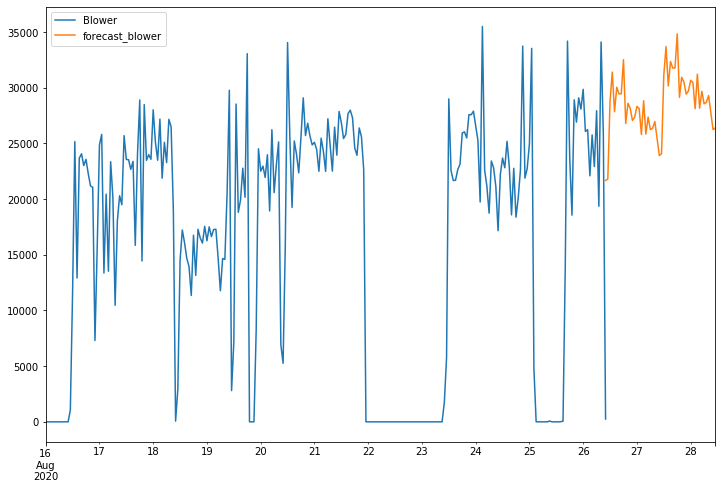

In [88]:
future_df1['forecast_blower'] = blower_model_fit.predict(start = 250, end = 300, dynamic= True)  
future_df1[['Blower', 'forecast_blower']].plot(figsize=(12, 8))

In [89]:
df1_forecast = future_df1.forecast_blower

In [90]:
df1_forecast.dropna(inplace = True)

In [91]:
df1_forecast = df1_forecast.astype(dtype = 'int64')

In [92]:
future_data=pd.concat([df1,df1_forecast])

In [93]:
future_data

,Blower,Filler,Labeller,forecast,0
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...
2020-08-28 07:00:00+00:00,NaN,NaN,NaN,NaN,28685.0
2020-08-28 08:00:00+00:00,NaN,NaN,NaN,NaN,29299.0
2020-08-28 09:00:00+00:00,NaN,NaN,NaN,NaN,27751.0
2020-08-28 10:00:00+00:00,NaN,NaN,NaN,NaN,26240.0


In [94]:
future_data = future_data.drop('forecast', axis = 1)

In [95]:
future_data.rename(columns={ 0 :'forecast_blower'}, inplace=True)

In [96]:
import dtale

In [97]:
dtale.show(future_data)

## LABELLER

In [103]:
df2=df

In [104]:
df2.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN


In [105]:
#Aggregation by hour
df2 = df.resample('H').sum()
df2.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [106]:
#Diving Labeller values by 2 which ever exceeds 360000 bottles
#df1['Labeller'] = df1['Labeller'].apply(lambda x: x if x>=36000 else x)

In [107]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

#The Dickey-Fuller test: It is used to determine the presence of unit root in a series, and hence help us to understand if the series is stationary or not.

#Null Hypothesis: The series has a unit root (value of a =1)

#Alternate Hypothesis: The series has no unit root

#If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.



In [108]:
test_result=adfuller(df2['Labeller'])

In [109]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Labeller):
    result=adfuller(Labeller)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [110]:
adfuller_test(df2['Labeller'])

ADF Test Statistic : -2.8396140611654768
p-value : 0.05283418417357014
#Lags Used : 8
Number of Observations Used : 242
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#The two most common ways to make a non-stationary time series stationary are: Differencing & Transforming

#Differencing: To make your series stationary, you take a difference between the data points.

#Transforming: Log transform is probably the most commonly used transformation if we see the diverging time series. However, it is suggested that you use transformation only in case differencing is not working.

In [111]:
#Differencing
df2['Labeller First Difference'] = df2['Labeller'] - df2['Labeller'].shift(1)

In [112]:
df2['Labeller'].shift(1)

time
2020-08-16 00:00:00+00:00        NaN
2020-08-16 01:00:00+00:00        2.0
2020-08-16 02:00:00+00:00        0.0
2020-08-16 03:00:00+00:00        0.0
2020-08-16 04:00:00+00:00        0.0
                              ...   
2020-08-26 06:00:00+00:00    31461.0
2020-08-26 07:00:00+00:00    25599.0
2020-08-26 08:00:00+00:00    34699.0
2020-08-26 09:00:00+00:00    34753.0
2020-08-26 10:00:00+00:00    27556.0
Freq: H, Name: Labeller, Length: 251, dtype: float64

In [113]:
df2['Seasonal First Difference'] = df2['Labeller']-df2['Labeller'].shift(24)

In [114]:
df2.head(20)

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference
time,,,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,-2.0,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 05:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 06:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 07:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 08:00:00+00:00,0.0,3.0,0.0,0.0,NaN


In [115]:
## Again test dickey fuller test
adfuller_test(df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6699265266694567
p-value : 0.004556609623666537
#Lags Used : 9
Number of Observations Used : 217
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


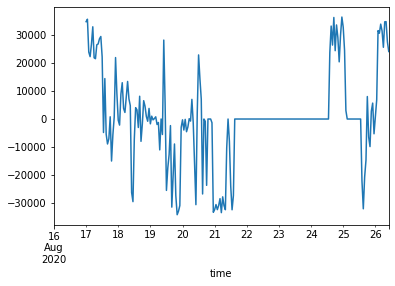

In [116]:
df2['Seasonal First Difference'].plot()

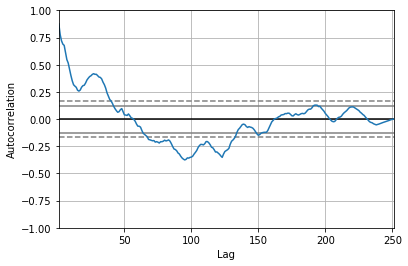

In [117]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Labeller'])
plt.show()

#ACF(auto-correlation function) : It describes how well the present value of the series is related to its past values.

#PACF(partial autocorrelation function) : Instead of finding correlations of present with lags like ACF, it finds the correlations of the residuals with the next lag value thus ‘partial’ and not ‘complete’ as we remove already found variations before we find next correlation.

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

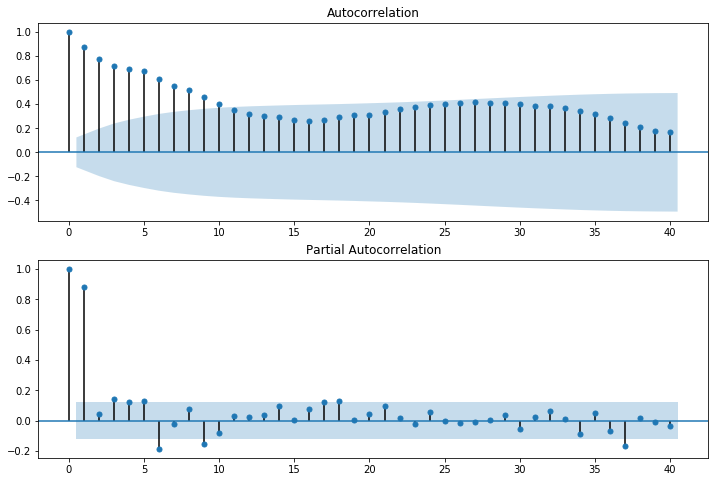

In [119]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Labeller'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Labeller'].iloc[0:],lags=40,ax=ax2)

ARIMA MODEL Auto Regression Integrated Moving Average It is specified by three parameters (p,d,q) Here, p is the order of the autoregressive model (number of time lags) d is the degree of differencing (no. of times the data have had passed values subtracted) q is the order of moving average model The ARIMA forecasting for a stationary time series is nothing but a linear (like linear regression) equation

In [120]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [121]:
model=ARIMA(df2['Labeller'],order=(1,0,1))
model_fit=model.fit()

In [122]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Labeller   No. Observations:                  251
Model:                     ARMA(1, 1)   Log Likelihood               -2587.213
Method:                       css-mle   S.D. of innovations           7228.191
Date:                Sat, 12 Dec 2020   AIC                           5182.425
Time:                        22:00:14   BIC                           5196.527
Sample:                    08-16-2020   HQIC                          5188.100
                         - 08-26-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.43e+04   3903.688      3.663      0.000    6649.580     2.2e+04
ar.L1.Labeller     0.8964      0.034     26.595      0.000       0.830       0.962
ma.L1.Labeller    -0.0858      0.092     -0.934      0.350      -0.266       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1156           +0.0000j            1.1156            0.0000
MA.1           11.6545           +0.0000j           11.6545            0.0000
-----------------------------------------------------------------------------
"""

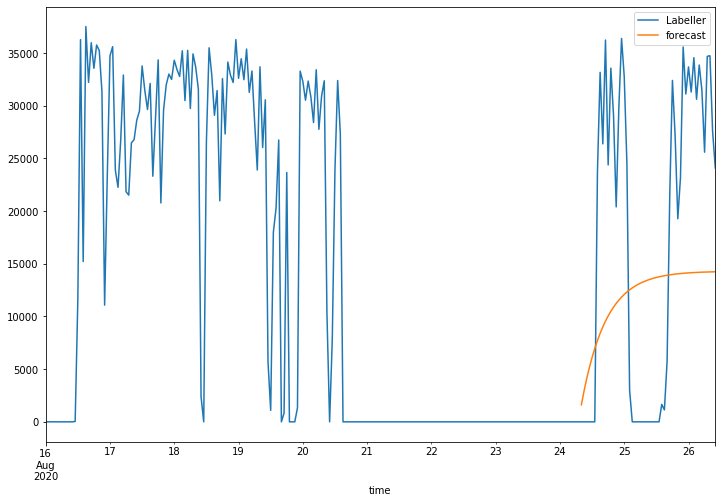

In [123]:
df1['forecast']=model_fit.predict(start=200,end=251,dynamic=True)
df1[['Labeller','forecast']].plot(figsize=(12,8))

In [124]:
model=sm.tsa.statespace.SARIMAX(df2['Labeller'],order=(1, 1, 1),seasonal_order=(1,1,1,24))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [125]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Labeller   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -2334.144
Date:                            Sat, 12 Dec 2020   AIC                           4678.287
Time:                                    22:00:21   BIC                           4695.390
Sample:                                08-16-2020   HQIC                          4685.189
                                     - 08-26-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7033      0.096      7.362      0.000       0.516       0.891
ma.L1         -0.8769      0.060    -14.522      0.000      -0.995      -0.759
ar.S.L24      -0.0701      0.092     -0.766      0.444      -0.249       0.109
ma.S.L24      -0.8033      0.099     -8.090      0.000      -0.998      -0.609
sigma2      5.159e+07   2.52e-09   2.05e+16      0.000    5.16e+07    5.16e+07
===================================================================================
Ljung-Box (Q):                       49.89   Jarque-Bera (JB):               147.46
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.58
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.07e+31. Standard errors may be unstable.
"""

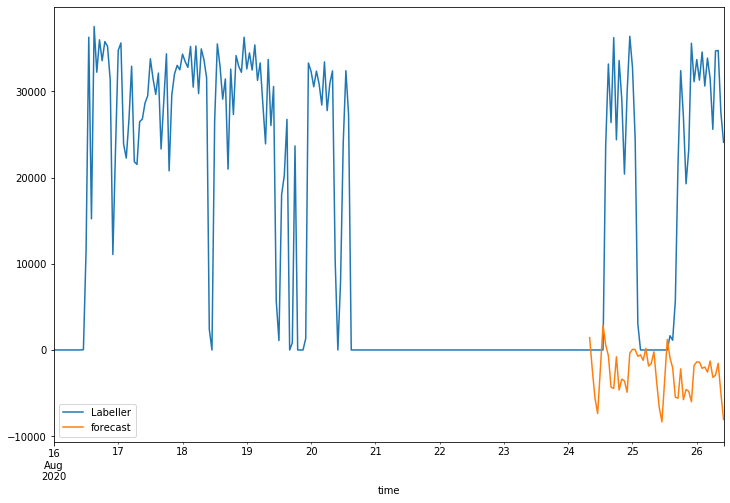

In [126]:
df2['forecast']=results.predict(start=200,end=251,dynamic=True)
df2[['Labeller','forecast']].plot(figsize=(12,8))

In [127]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(hours=x)for x in range(0,24)]

In [128]:
future_datest_df2=pd.DataFrame(index=future_dates[1:],columns=df2.columns)

In [129]:
future_datest_df2.tail()

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference,forecast
2020-08-27 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
future_datest_df2.head()

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference,forecast
2020-08-26 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-26 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-26 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-26 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-26 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
future_df2=pd.concat([df2,future_datest_df2])

In [132]:
future_df2.head()

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference,forecast
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,-2.0,NaN,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN


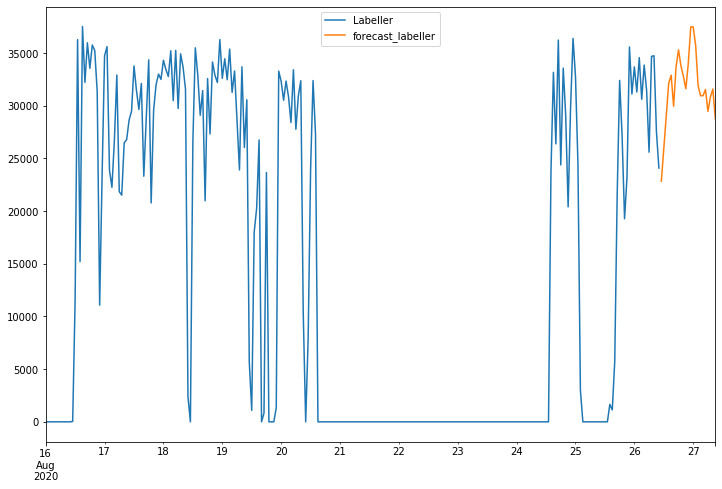

In [133]:
future_df2['forecast_labeller'] = results.predict(start = 251, end = 275, dynamic= True)  
future_df2[['Labeller', 'forecast_labeller']].plot(figsize=(12, 8))

In [134]:
import dtale

In [135]:
dtale.show(future_df2)

In [136]:
#Creating a data frame to remove decimals in Labeller
forecast_df2 = future_df2.forecast_labeller
forecast_df2.dropna(inplace = True)
forecast_df2 = forecast_df2.astype(dtype = 'int64')

In [137]:
future_data2=pd.concat([df2,forecast_df2])
future_data2

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference,forecast,0
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,-2.0,NaN,NaN,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-27 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,31545.0
2020-08-27 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,29476.0
2020-08-27 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,30829.0
2020-08-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,31592.0


In [138]:
future_data2.rename(columns={ 0 :'forecast_labeller'}, inplace=True)
future_data2 = future_data2.iloc[:, [0, 1, 2, 6]]

In [139]:
#Forecasting final values of Labeller
dtale.show(future_data2, ignore_duplicate=True)

## FILLER 

In [140]:
df3 = df

In [141]:
df3.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN


In [142]:
#Aggregation by hour
df3 = df.resample('H').sum()
df3.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [143]:
#As filler consists of lot of null values we are importing few values from past days 
df3.iloc[111:144] = df3.iloc[63:96].to_numpy()

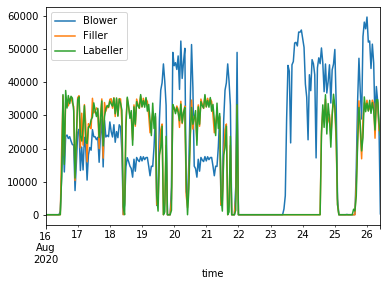

In [144]:
df3.plot()

In [145]:
df3.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [146]:
#Creating train and test set 
train = df3[0:175] 
test = df3[175:]

In [147]:
filler_train = train.Filler
filler_test = test.Filler

In [148]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [149]:
test_result=adfuller(df3['Filler'])

In [150]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Filler):
    result=adfuller(Filler)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [151]:
adfuller_test(df3['Filler'])

ADF Test Statistic : -2.986859068082989
p-value : 0.03613995546033269
#Lags Used : 5
Number of Observations Used : 245
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #filler only
import statsmodels.api as sm

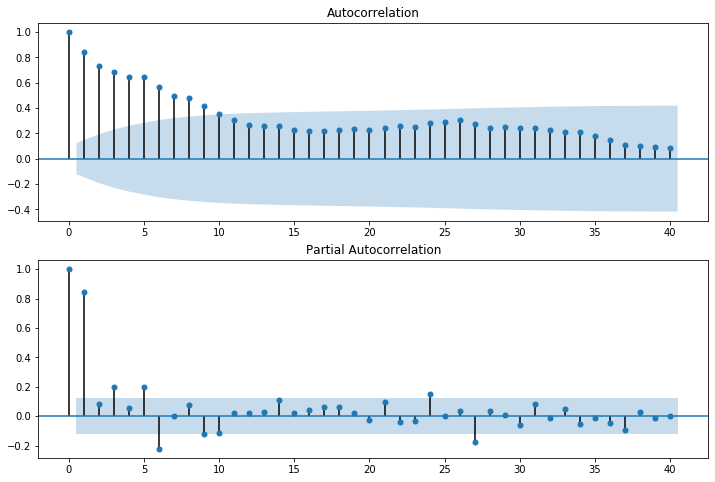

In [153]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df3['Filler'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3['Filler'].iloc[0:],lags=40,ax=ax2)

In [154]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [155]:
#model=ARIMA(df1['Filler'],order=(1,0,1))
#model_fit=model.fit()
filler_model = ARIMA(filler_train, order=(1,0,1))

In [156]:
#model_fit.summary()
filler_model_fit = filler_model.fit()

In [157]:
filler_model_fit.aic

3683.113202296485

In [158]:
filler_forecast = filler_model_fit.forecast(steps = 76)[0]

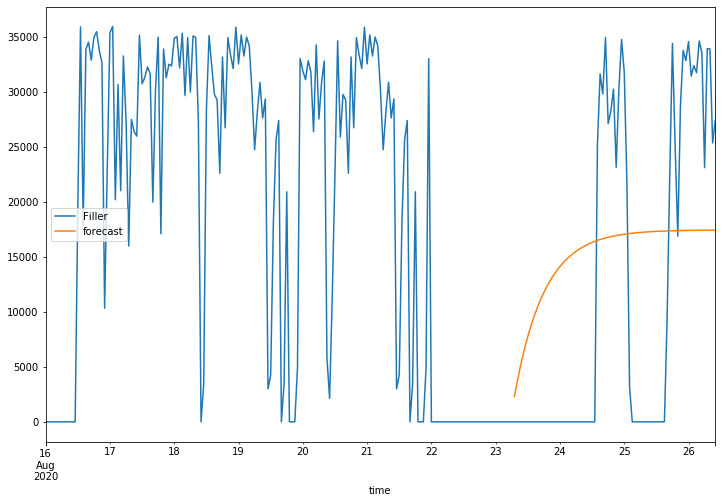

In [159]:
#df1['forecast']=model_fit.predict(start=233,end=250,dynamic=True)
#df1[['Filler','forecast']].plot(figsize=(12,8))
df3['forecast']=filler_model_fit.predict(start=175,end=251,dynamic=True)
df3[['Filler','forecast']].plot(figsize=(12,8))

In [160]:
from sklearn.metrics import mean_squared_error
#from math import sqrt
import numpy as np

In [161]:
np.sqrt(mean_squared_error(filler_test,filler_forecast))

13759.856747513531

In [162]:
#model=sm.tsa.statespace.SARIMAX(df1['Filler'],order=(1, 1, 1),seasonal_order=(1,1,1,24))
#results=model.fit()
filler_model=sm.tsa.statespace.SARIMAX(filler_train,order=(1, 0, 1),seasonal_order=(1,0,1,24))

In [163]:
filler_model_fit = filler_model.fit()

In [164]:
#results.summary()
filler_model_fit.aic

3677.713907283943

In [165]:
filler_forecast = filler_model_fit.forecast(steps = 76)

In [166]:
np.sqrt(mean_squared_error(filler_test,filler_forecast))

16193.875805722646

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



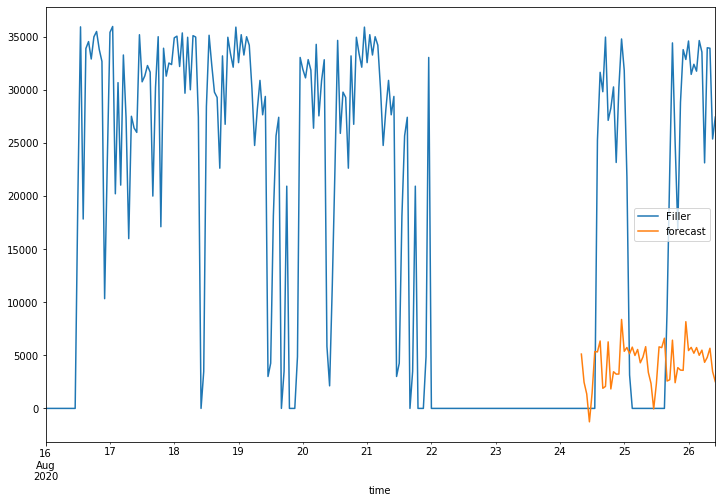

In [167]:
df3['forecast']=filler_model_fit.predict(start=200,end=251,dynamic=True)
df3[['Filler','forecast']].plot(figsize=(12,8))

In [168]:
from pandas.tseries.offsets import DateOffset
future_dates=[df3.index[-1]+ DateOffset(hours=x)for x in range(0,48)]

In [169]:
future_datest_df3=pd.DataFrame(index=future_dates[1:],columns=df3.columns)

In [175]:
future_datest_df3.head(10)

,Blower,Filler,Labeller,forecast
2020-08-26 11:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 12:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 13:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 14:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 15:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 16:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 17:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 18:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 19:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 20:00:00+00:00,NaN,NaN,NaN,NaN


In [176]:
future_df3=pd.concat([df3,future_datest_df3])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



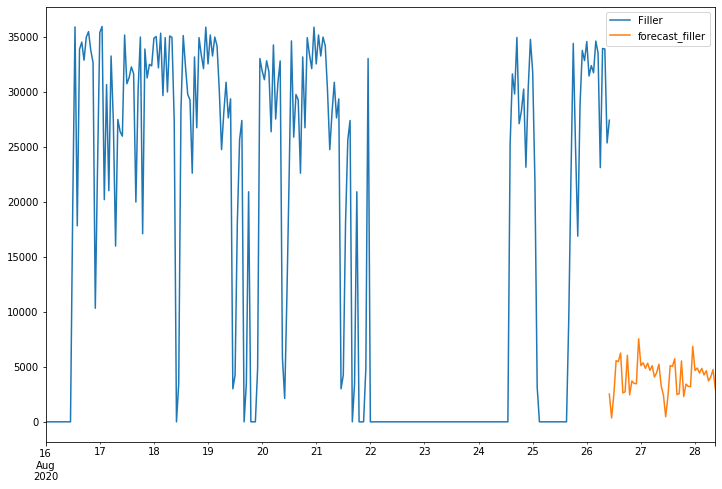

In [177]:
future_df3['forecast_filler'] = filler_model_fit.predict(start = 250, end = 300, dynamic= True)  
future_df3[['Filler', 'forecast_filler']].plot(figsize=(12, 8))

In [178]:
import dtale

In [179]:
dtale.show(future_df3)

http://DESKTOP-TBF4MHO:40000/dtale/main/4
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


In [180]:
#Creating a data frame to remove decimals in filler
forecast_df3 = future_df3.forecast_filler
forecast_df3.dropna(inplace = True)
forecast_df3 = forecast_df3.astype(dtype = 'int64')
future_df3=pd.concat([df3,forecast_df3])
future_df3

,Blower,Filler,Labeller,forecast,0
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,NaN,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...
2020-08-28 05:00:00+00:00,NaN,NaN,NaN,NaN,4640.0
2020-08-28 06:00:00+00:00,NaN,NaN,NaN,NaN,3711.0
2020-08-28 07:00:00+00:00,NaN,NaN,NaN,NaN,4080.0
2020-08-28 08:00:00+00:00,NaN,NaN,NaN,NaN,4755.0


In [181]:
future_df3 = future_df3.drop('forecast', axis = 1)
future_df3.rename(columns={ 0 :'forecast_filler'}, inplace=True)

In [182]:
#Forecasting final values of filler
dtale.show(future_df3, ignore_duplicate=True)